In [1]:
from Bayesian_Neural_Network import bayesian_neural_network
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10120024)

# Model Performance On Singular Input

## On Linear Data

In [2]:
input_layer = [1]
hidden_layers = [2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

feature_data = y_data[:-1].reshape(-1, 1, 1)
target_data = y_data[1:].reshape(-1, 1, 1)

n_epochs = 100
learning_rate = 1e-6

In [3]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate)
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [4]:
bnn.train_model(n_epochs)

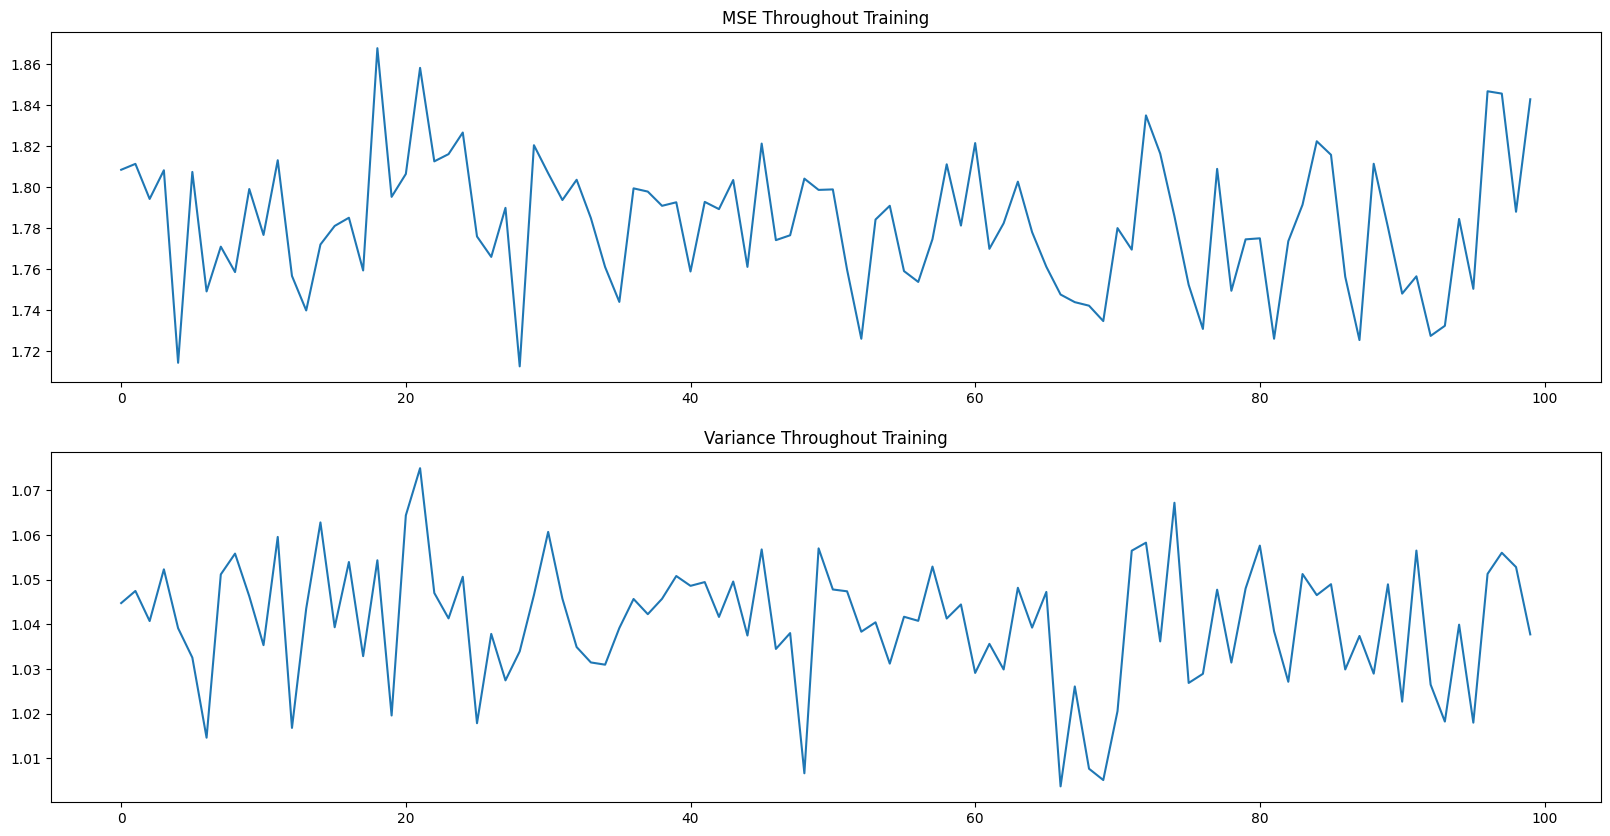

In [5]:
bnn.visualize_performance()

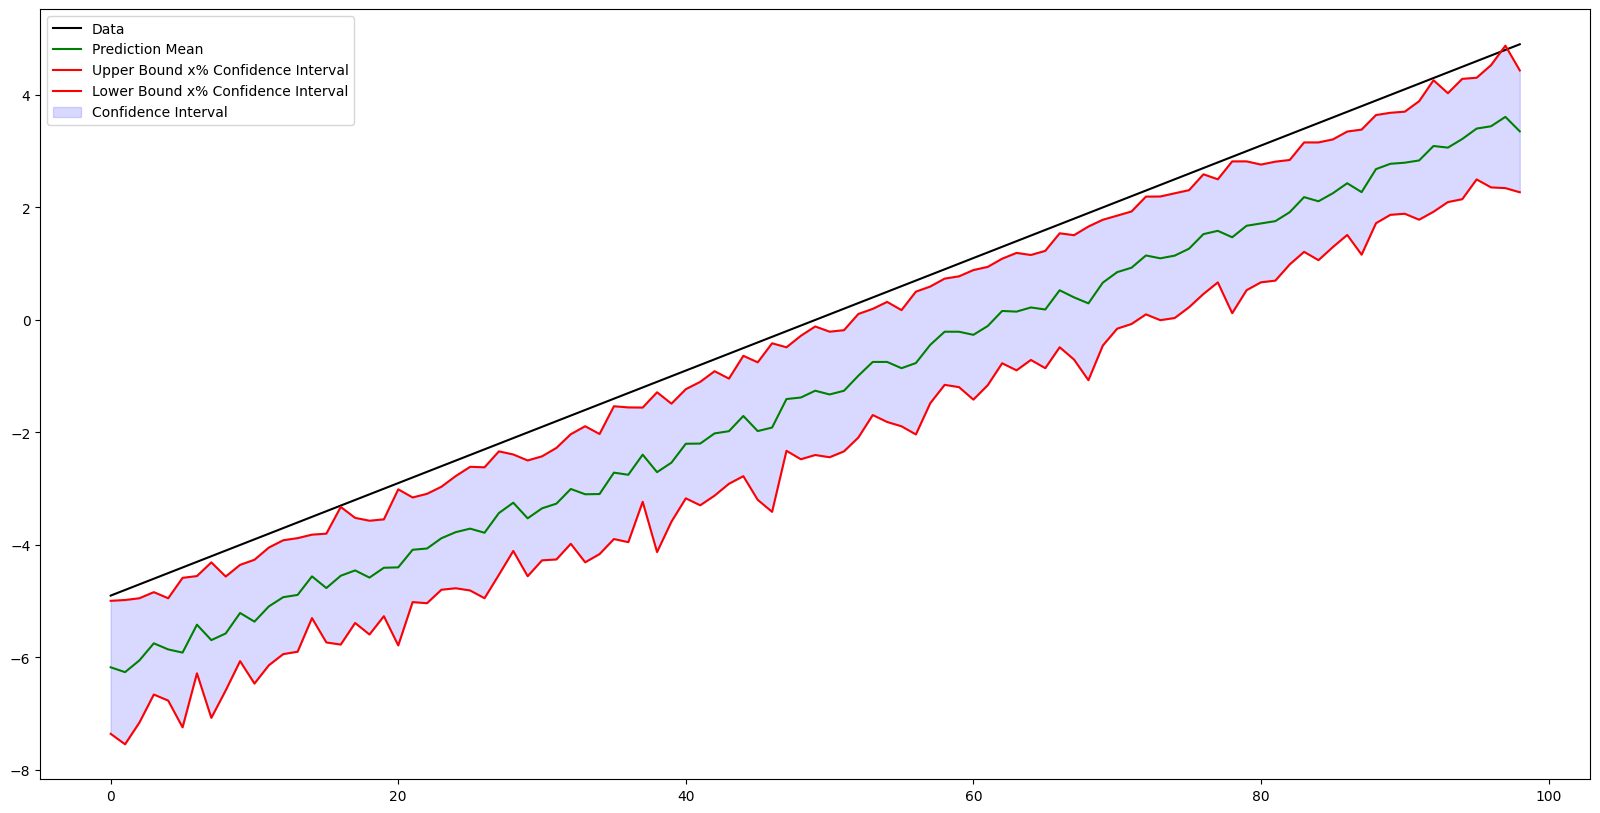

In [6]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()

## On Sinusoidal Data

In [7]:
input_layer = [1]
hidden_layers = [4]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data)

feature_data = y_data[:-1].reshape(-1, 1, 1)
target_data = y_data[1:].reshape(-1, 1, 1)

n_epochs = 100
learning_rate = 1e-7

In [8]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate)
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [9]:
bnn.train_model(n_epochs)

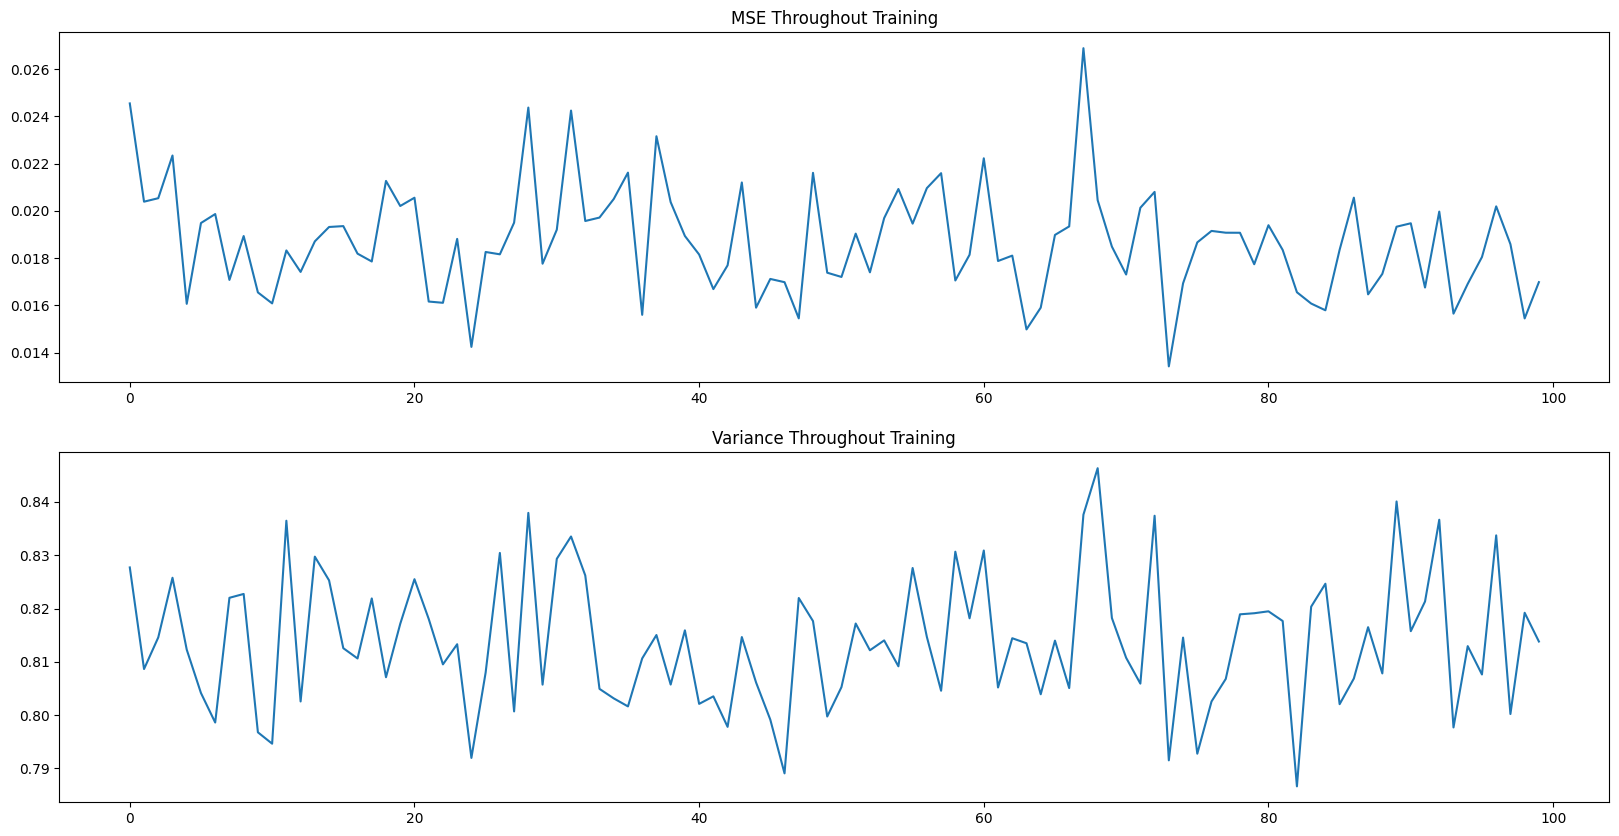

In [10]:
bnn.visualize_performance()

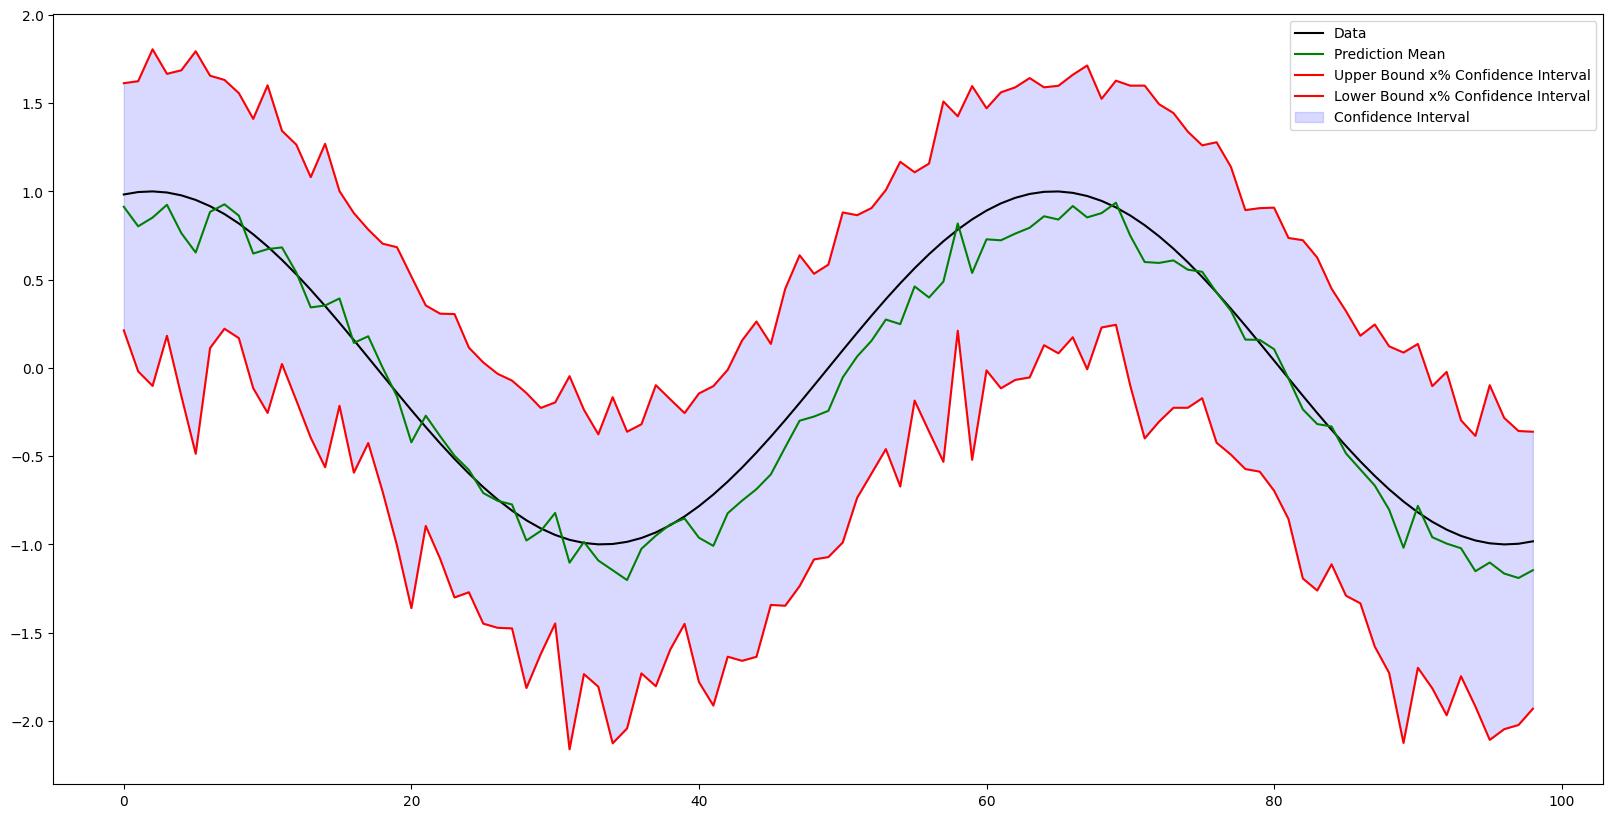

In [11]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()

# Model Performance On Multiple Inputs

## On Linear Data

In [12]:
input_layer = [2]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = x_data

feature_data = y_data
target_data = y_data.reshape(-1, 1, 1)

n_epochs = 100
window_size = 2
learning_rate = 1e-5

In [13]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate, window_size)
bnn.generate_windowed_dataset()
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [14]:
bnn.train_model(n_epochs)

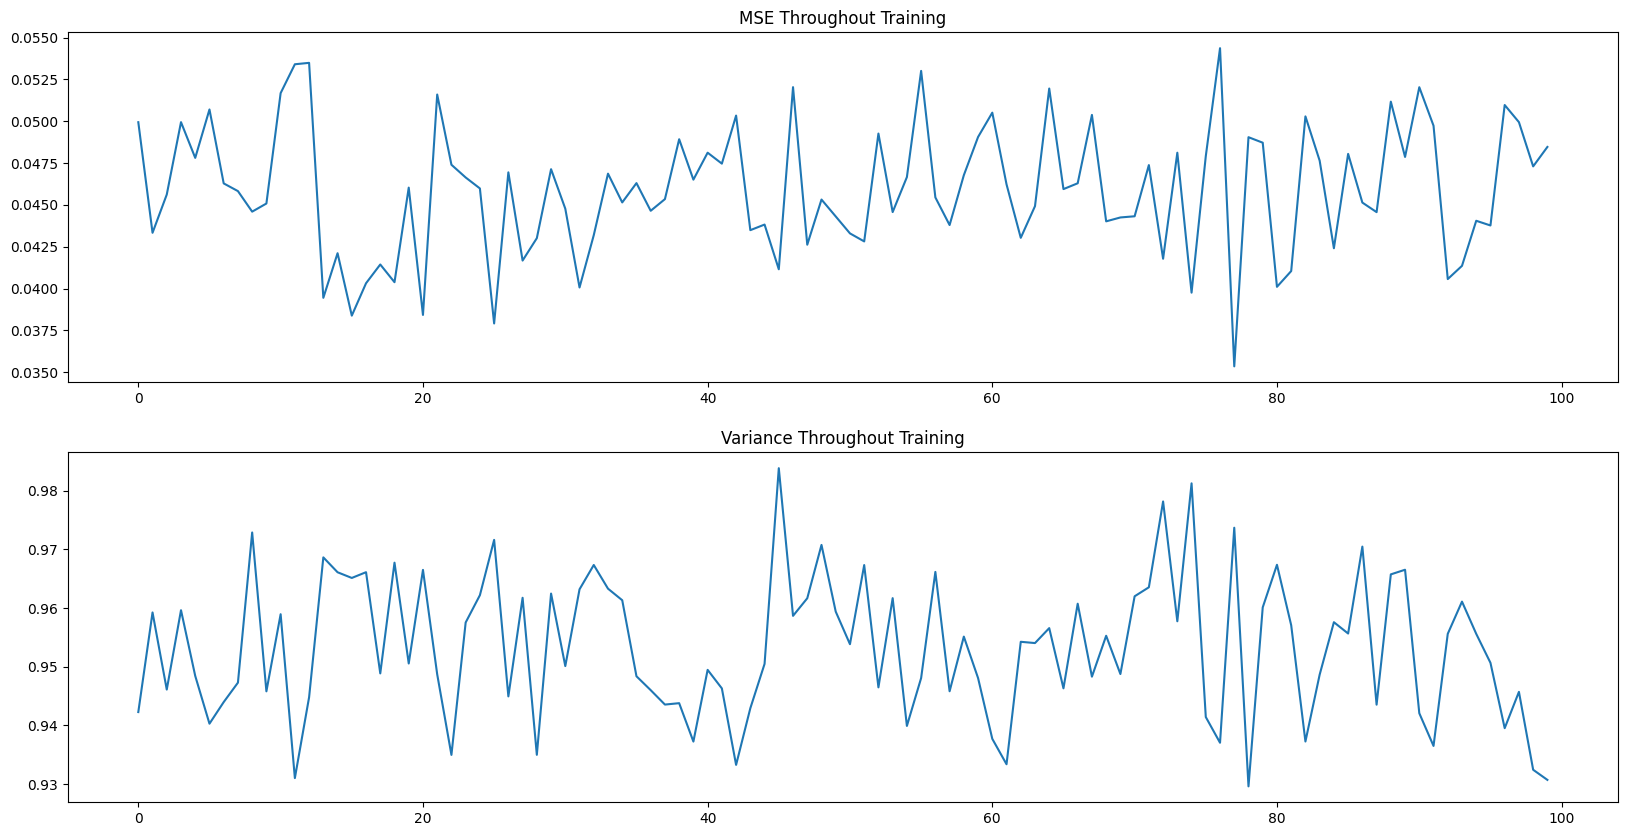

In [15]:
bnn.visualize_performance()

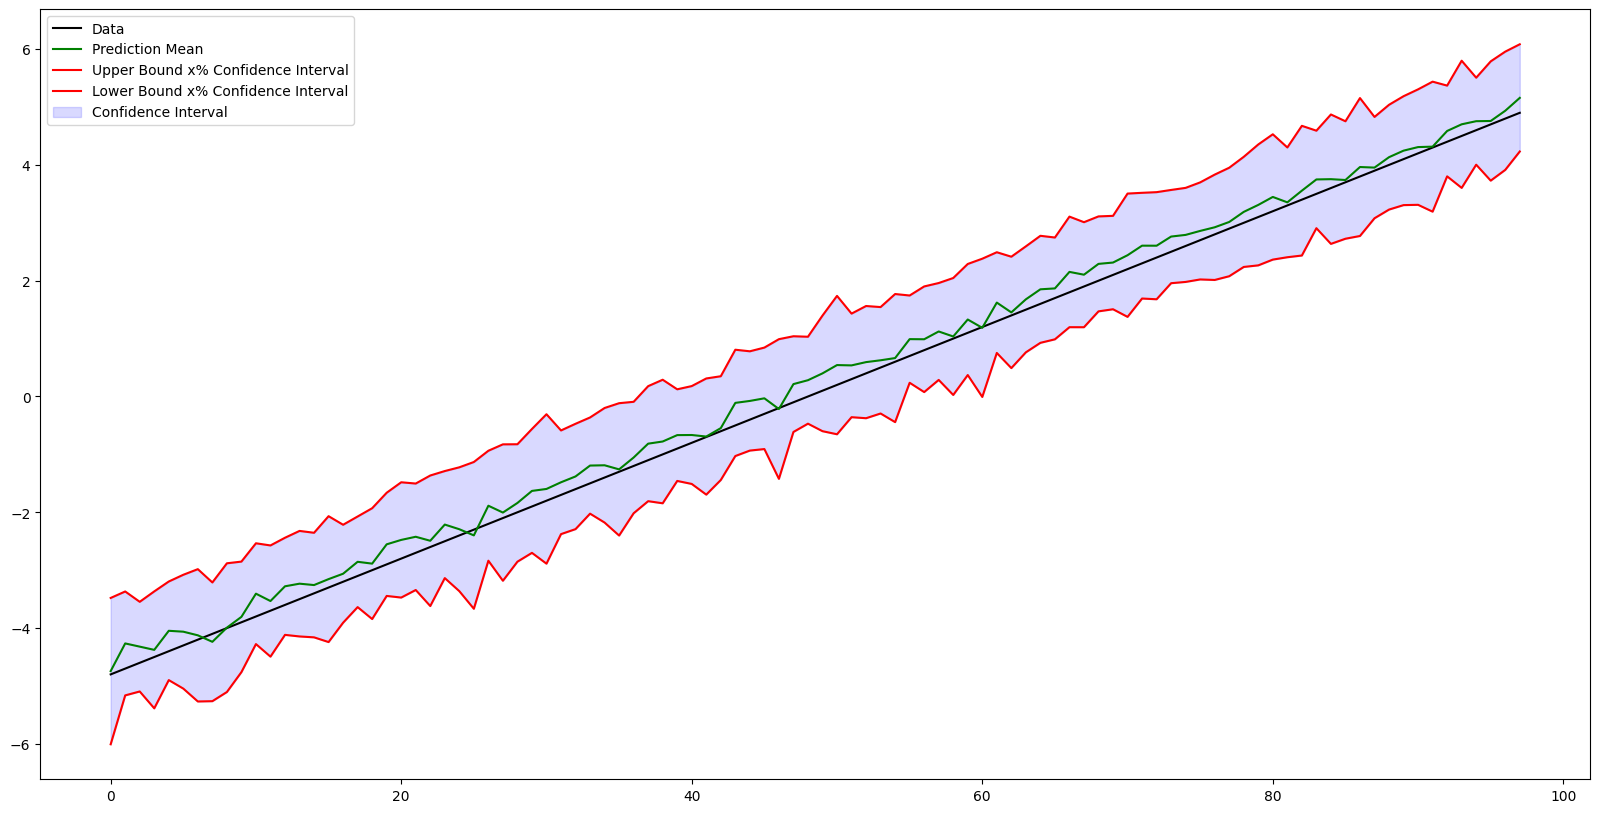

In [16]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()

## On Sinusoidal Data

In [17]:
input_layer = [2]
hidden_layers = [4, 2]
output_layer = [1]

x_data = np.arange(-5, 5, 0.1) 
y_data = np.sin(x_data)

feature_data = y_data
target_data = y_data.reshape(-1, 1, 1)

n_epochs = 100
window_size = 2
learning_rate = 1e-11

In [18]:
bnn = bayesian_neural_network(input_layer, hidden_layers, output_layer, feature_data, target_data, learning_rate, window_size)
bnn.generate_windowed_dataset()
bnn.standardize_dataset()
bnn.generate_m()
bnn.generate_v()

In [20]:
bnn.train_model(n_epochs)

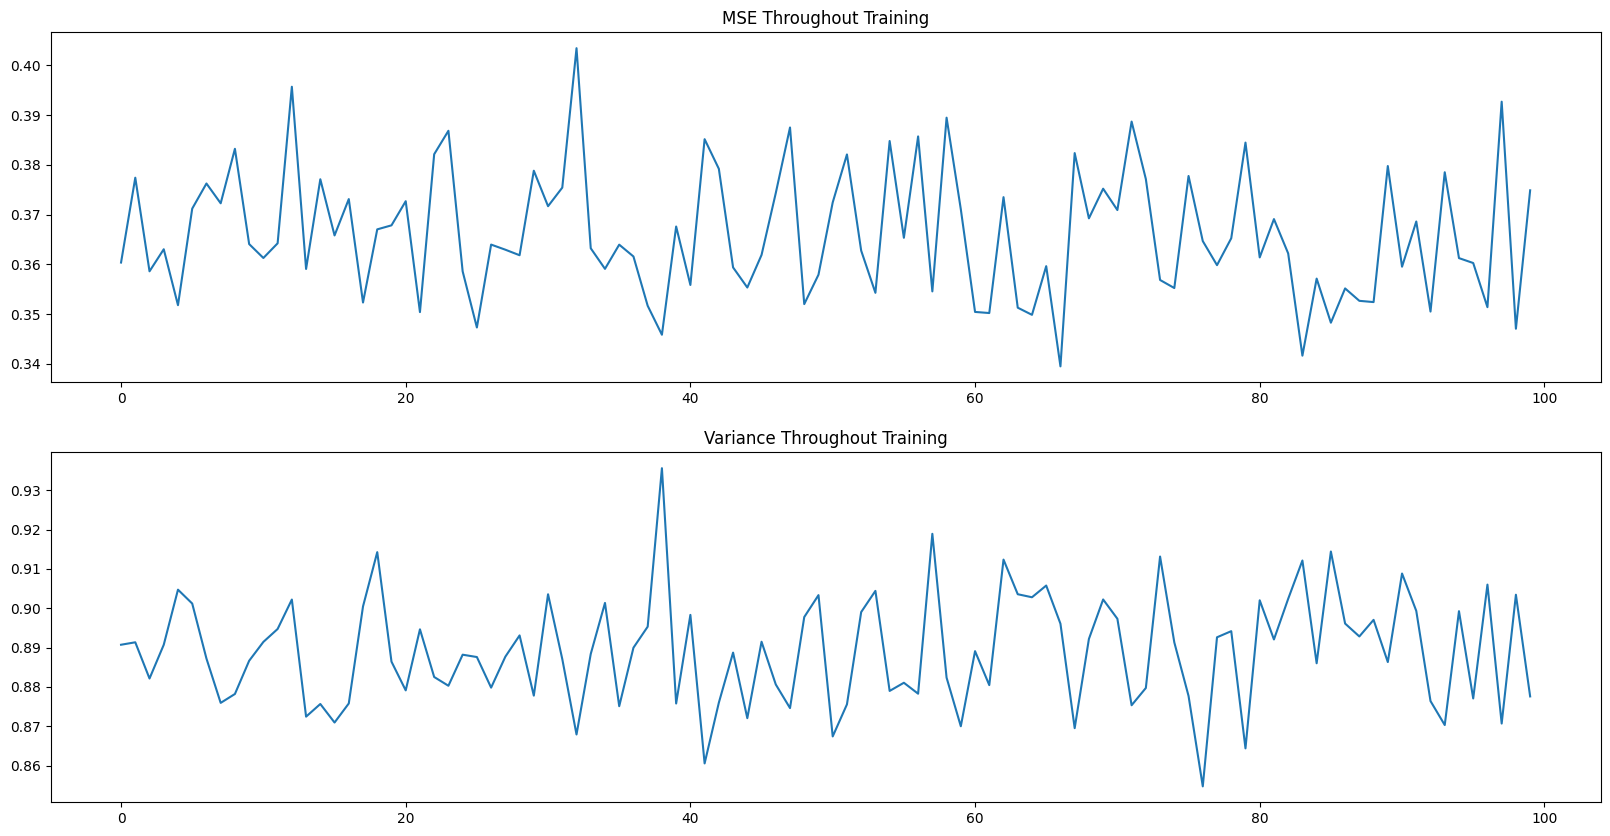

In [21]:
bnn.visualize_performance()

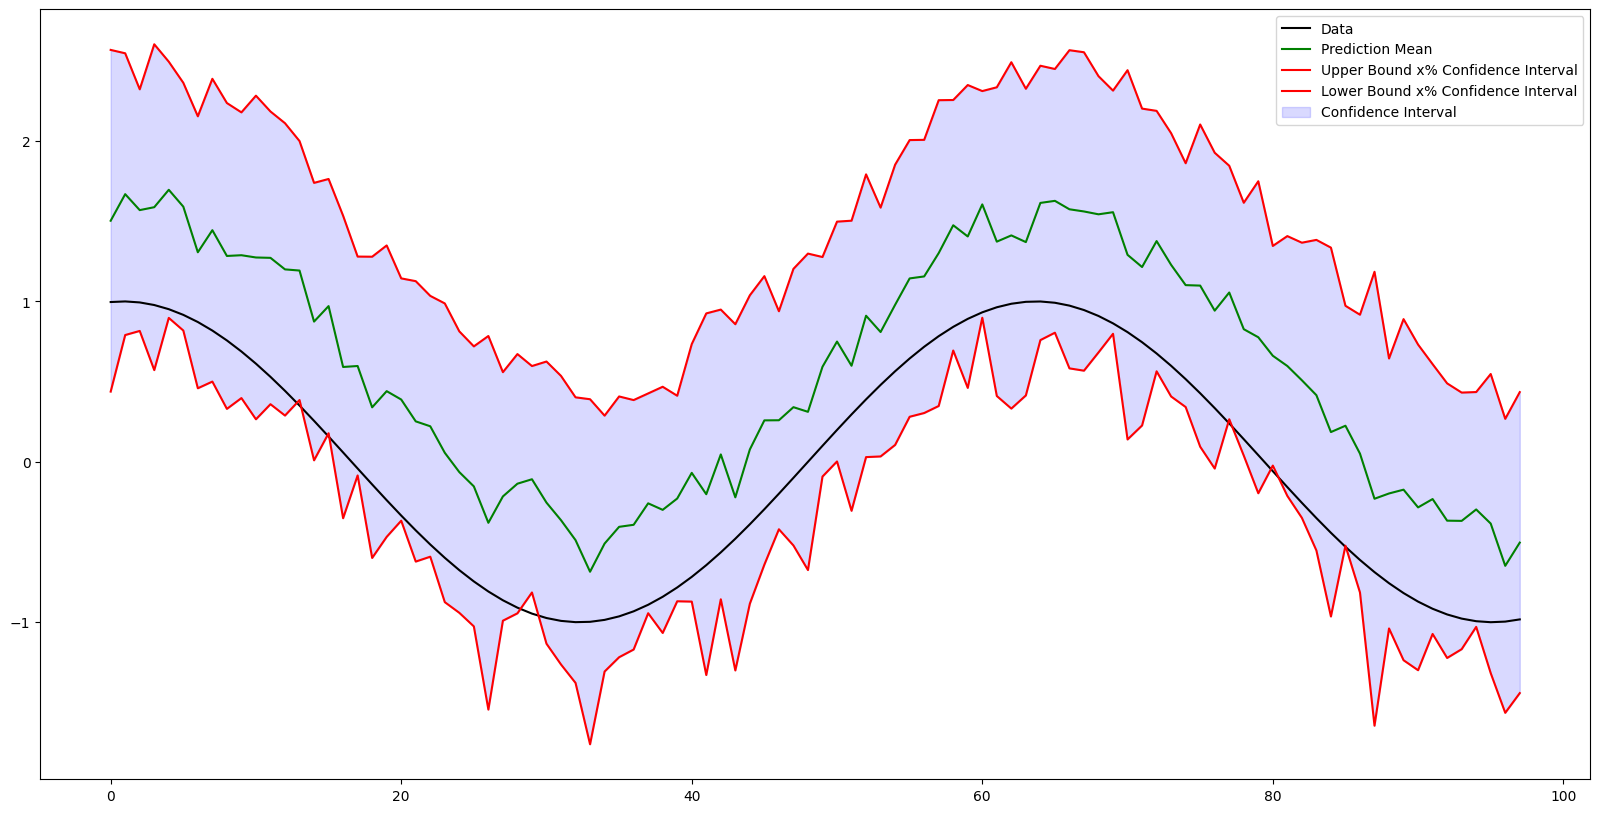

In [22]:
bnn.predict_on_seen_data()
bnn.visualize_predictions_on_seen_data()